# Sistema de predición del indice de contaminación en el aire por dias en Colombia.

La IA puede predecir la calidad del aire.

Parametros:
Componentes en el aire `(NO2 y PM2.5)` en el departamento de Antioquia.

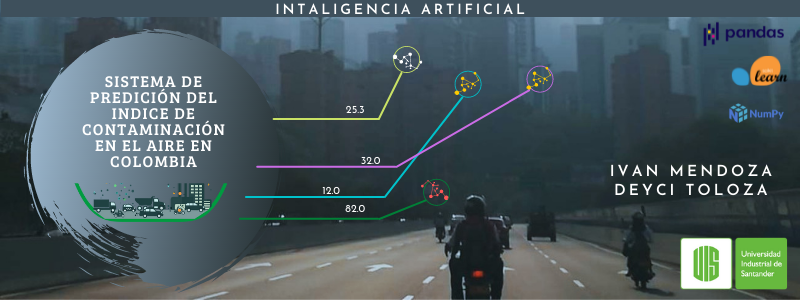

In [ ]:
#@title Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Montar Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#@title Carga del Dataset Antioquia
#Ubicación: Antioquia. Rango toma de los datos: 29-04-2021 a 31-01-2022
data = pd.read_csv('/content/drive/MyDrive/Proyecto-IA/data_21429_22131.csv')
data.shape

(90345, 11)

In [ ]:
#@title *Antioquia, 29-04-2021 a 31-01-2022*
data=data.sort_values('local',ascending=True)
data.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
90344,10797,CEN-TRAF - Estación Tráfico Centro,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,21.000000,µg/m³,6.252561,-75.569580
90322,10641,"MED-UNNV - Medellín, centro occidente - Unive...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,-9999.000000,ppm,6.263370,-75.577004
90323,10493,GIR-SOSN - _OFF-Girardota - S.O.S Aburrá Norte,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,co,-9999.000000,ppm,6.378433,-75.451141
90324,10708,MED-ITMR - Institucion Universitaria ITM Robledo,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,no2,0.027437,ppm,6.275564,-75.588287
90325,10641,"MED-UNNV - Medellín, centro occidente - Unive...",Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,-9999.000000,µg/m³,6.263370,-75.577004


In [ ]:
#@title Cantidad de registros en la ciudad de medellin por cada componente
print('no2: '+str(data[data["parameter"].str.contains('no2')].shape[0]), 'pm25: '+str(data[data["parameter"].str.contains('pm25')].shape[0]))


no2: 25298 pm25: 54677


In [ ]:
#@title Hallar la máquina con mas registros.
#Escojo la ubicación con mayor numero de registros.
Id=data['locationId'].unique()
x=[]
for i in Id:
  x.append(data[data['locationId']==i].shape[0])
#print(x)
print("Maquína según ubicación que posee mas registros en Antioquia es: ",Id[x.index(max(x))],"con ",max(x),"datos.")

Maquína según ubicación que posee mas registros en Antioquia es:  10683 con  10504 datos.


Ubicación del codigo *10683*.
[592F+W2C Sabaneta, Antioquia](https://www.google.com/maps/place/6%C2%B009'08.3%22N+75%C2%B037'39.0%22W/@6.152313,-75.6296757,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x6f79659a7467a948!8m2!3d6.152313!4d-75.627487)

In [ ]:
#@title Parámetro [no2] o [pm25]  
#Asigno el parametro que deseo a una variable.
parametro = "pm25" #@param {type:"string"}

In [ ]:
#@title Filtro del parametro en el dataset Antioquia
data=data[data['locationId']==Id[x.index(max(x))]]
p=pd.DataFrame(data[data['parameter']==parametro])

In [ ]:
#@title Dataset parámetro
print(p.shape)
p.head(-1)

(4456, 11)


,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
90337,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T02:00:00+00:00,2021-04-29T01:00:00-01:00,pm25,6.0,µg/m³,6.152313,-75.627487
90302,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T03:00:00+00:00,2021-04-29T02:00:00-01:00,pm25,9.0,µg/m³,6.152313,-75.627487
90281,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T04:00:00+00:00,2021-04-29T03:00:00-01:00,pm25,13.0,µg/m³,6.152313,-75.627487
90259,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T05:00:00+00:00,2021-04-29T04:00:00-01:00,pm25,21.0,µg/m³,6.152313,-75.627487
90236,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2021-04-29T06:00:00+00:00,2021-04-29T05:00:00-01:00,pm25,22.0,µg/m³,6.152313,-75.627487
...,...,...,...,...,...,...,...,...,...,...,...
85,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T00:00:00+00:00,2022-01-30T23:00:00-01:00,pm25,16.0,µg/m³,6.152313,-75.627487
66,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T01:00:00+00:00,2022-01-31T00:00:00-01:00,pm25,16.0,µg/m³,6.152313,-75.627487
49,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T02:00:00+00:00,2022-01-31T01:00:00-01:00,pm25,17.0,µg/m³,6.152313,-75.627487
41,10683,SUR-TRAF - Estación Tráfico Sur,Medellin,CO,2022-01-31T03:00:00+00:00,2022-01-31T02:00:00-01:00,pm25,21.0,µg/m³,6.152313,-75.627487


#Limpieza del dataset (Análisis)

---
<h3>Aqui descartamos las columnas que no necesitamos, se ajusta el formato de las fechas y horas (UTC) y se prepara el dataset para analizar. </h3>

---






In [ ]:
#@title Eliminación de columnas
p.drop(['locationId','location','city','country', 'local', 'parameter', 'unit', 'latitude','longitude'], axis = 'columns', inplace=True)
p = p.replace(p[p['value']<0].value.unique(), np.mean(p[p.value>0].value))

In [ ]:
p.head()

,utc,value
90337,2021-04-29T02:00:00+00:00,6.0
90302,2021-04-29T03:00:00+00:00,9.0
90281,2021-04-29T04:00:00+00:00,13.0
90259,2021-04-29T05:00:00+00:00,21.0
90236,2021-04-29T06:00:00+00:00,22.0


In [ ]:
#@title Columnas con fecha y hora del registro.
#Creamos un par de columnas que guarde la fecha y la hora de los datos.
p['Fecha']=p['utc'].map(lambda x:x.split('T')[0])
p['horas']=p['utc'].map(lambda x:x.split('T')[1])
p['Hora']=p['horas'].map(lambda x:x.split('+')[0])
p['res']=p['horas'].map(lambda x:x.split('+')[1])
p.drop(['utc','res','horas'], axis = 'columns', inplace=True)

In [ ]:
p.head()

,value,Fecha,Hora
90337,6.0,2021-04-29,02:00:00
90302,9.0,2021-04-29,03:00:00
90281,13.0,2021-04-29,04:00:00
90259,21.0,2021-04-29,05:00:00
90236,22.0,2021-04-29,06:00:00


In [ ]:
#@title Horas a enteros
p["Hora"]=p["Hora"].map(lambda x:x.split(':')[0]).astype(int)

In [ ]:
p.head()

,value,Fecha,Hora
90337,6.0,2021-04-29,2
90302,9.0,2021-04-29,3
90281,13.0,2021-04-29,4
90259,21.0,2021-04-29,5
90236,22.0,2021-04-29,6


#Análisis

In [ ]:
#@title Agrupación por horas con su maximo indice de contaminación (value).
maxhor=pd.DataFrame(p.groupby(['Hora']).max('value')["value"])
maxhor.stack()
listmax=maxhor.values[:,0].tolist()
maxhor.head(24)

,value
Hora,
0,67.0
1,59.0
2,66.0
3,62.0
4,68.0
5,61.0
6,74.0
7,67.0
8,57.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Indice')

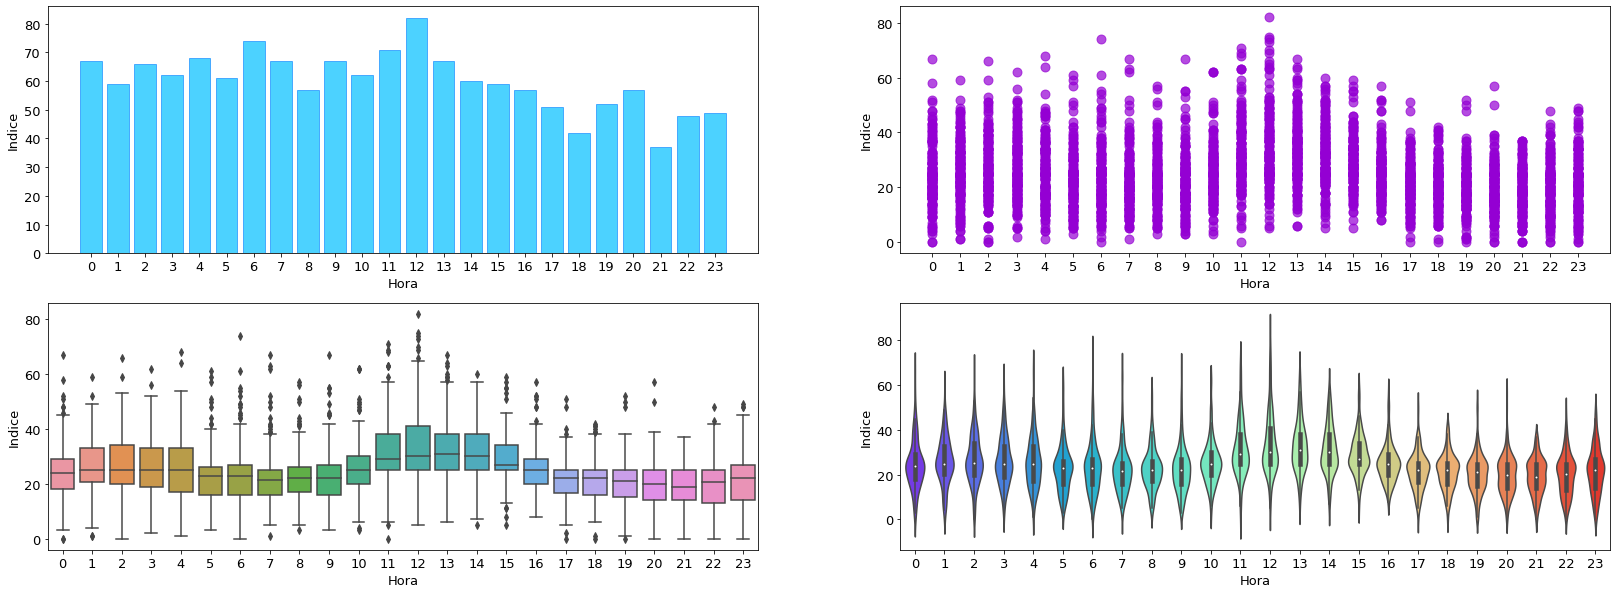

In [ ]:
#@title Plot Analisis Horas
plt.rcParams.update({'font.size': 13}) 
a=15
xh=range(0,24)
plt.figure(figsize=(28,10))
plt.subplot(2,2, 1)
plt.xticks(xh)
plt.bar(xh,listmax,color="deepskyblue",ec="dodgerblue", alpha=.7)
plt.xlabel('Hora')
plt.ylabel('Indice')
plt.subplot(2,2, 2)
plt.xticks(xh)
plt.scatter(p["Hora"], p["value"], alpha=0.7,c="darkviolet",s=80)
plt.xlabel('Hora')
plt.ylabel('Indice')
plt.subplot(2,2, 3)
sns.boxplot(p["Hora"], p["value"])
plt.xlabel('Hora')
plt.ylabel('Indice')
plt.subplot(2,2, 4)
sns.violinplot(p["Hora"], p["value"],palette="rainbow")
plt.xlabel('Hora')
plt.ylabel('Indice')


In [ ]:
#@title Hora en UTC con el mayor indice.
#Comprobar la hora con el mayor indice de contaminación. 
p[p["value"]==p["value"].max()]

,value,Fecha,Hora
57854,82.0,2021-06-30,12


In [ ]:
#@title Hora local del dato 7 A.M
#Cambio utc a local
top=(p[p["value"]==p["value"].max()].values[:,2][0])-5
top

7

#Limpieza del Dataset (Entrenamiento)

In [ ]:
#@title Filtro y ajuste del dataset parametro.
#Se asigna el dataset p nuevamente pero con los registro de 7 A.M
p=pd.DataFrame(p[p["Hora"]==top])
#Eliminamos la columna hora, pues todas serán 7 A.M
p.drop(["Hora"], axis = 'columns', inplace=True)
#Reasignamos el indice del dataset.
p.reset_index(inplace=True, drop=True)

In [ ]:
p.head()

,value,Fecha
0,8.0,2021-04-29
1,16.0,2021-04-30
2,32.0,2021-05-01
3,5.0,2021-05-02
4,22.0,2021-05-03


In [ ]:
#@title Fechas a enteros.
x=p.Fecha.unique()
n=0
for i in range(p.shape[0]):
  if n==x.shape[0]:
    continue
  if(p.iloc[i].Fecha==x[n]):
    p.replace(p.iloc[i].Fecha,n,inplace=True)
    n=n+1

In [ ]:
print(p.shape)
p[15:26]

(186, 2)


,value,Fecha
15,8.0,15
16,27.0,16
17,16.0,17
18,18.0,18
19,1.0,19
20,17.0,20
21,33.0,21
22,24.0,22
23,41.0,23
24,9.0,24


In [ ]:
#@title Crear un diccionario con fechas y su asignación a entero.
y=p.Fecha.unique()
dicfecha=dict(zip(x, y))
dicfecha

{'2021-04-29': 0,
 '2021-04-30': 1,
 '2021-05-01': 2,
 '2021-05-02': 3,
 '2021-05-03': 4,
 '2021-05-04': 5,
 '2021-05-05': 6,
 '2021-05-06': 7,
 '2021-05-07': 8,
 '2021-05-08': 9,
 '2021-05-09': 10,
 '2021-05-10': 11,
 '2021-05-11': 12,
 '2021-05-12': 13,
 '2021-05-13': 14,
 '2021-05-14': 15,
 '2021-05-15': 16,
 '2021-05-16': 17,
 '2021-05-17': 18,
 '2021-05-18': 19,
 '2021-05-19': 20,
 '2021-05-20': 21,
 '2021-05-21': 22,
 '2021-05-22': 23,
 '2021-05-24': 24,
 '2021-05-25': 25,
 '2021-05-27': 26,
 '2021-05-28': 27,
 '2021-05-29': 28,
 '2021-05-30': 29,
 '2021-05-31': 30,
 '2021-06-01': 31,
 '2021-06-02': 32,
 '2021-06-03': 33,
 '2021-06-04': 34,
 '2021-06-05': 35,
 '2021-06-06': 36,
 '2021-06-07': 37,
 '2021-06-08': 38,
 '2021-06-10': 39,
 '2021-06-11': 40,
 '2021-06-12': 41,
 '2021-06-13': 42,
 '2021-06-14': 43,
 '2021-06-15': 44,
 '2021-06-17': 45,
 '2021-06-18': 46,
 '2021-06-19': 47,
 '2021-06-20': 48,
 '2021-06-21': 49,
 '2021-06-22': 50,
 '2021-06-23': 51,
 '2021-06-24': 52,
 '2

#Entrenamiento

In [ ]:
#@title Entrenamiento con Decision Tree Regressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
np.random.seed(21)
X = p["Fecha"].values.reshape(-1,1)
y = p["value"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
regressorDTR = DecisionTreeRegressor()
regressorDTR.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#@title Valoración de la precisión del Regresor DTR (Errores)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressorDTR.predict(X_test)))
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressorDTR.predict(X_test))))
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressorDTR.predict(X_test)))

MSE depth split data  184.554
RMSE depth split data  13.585
MAE depth split data  10.655


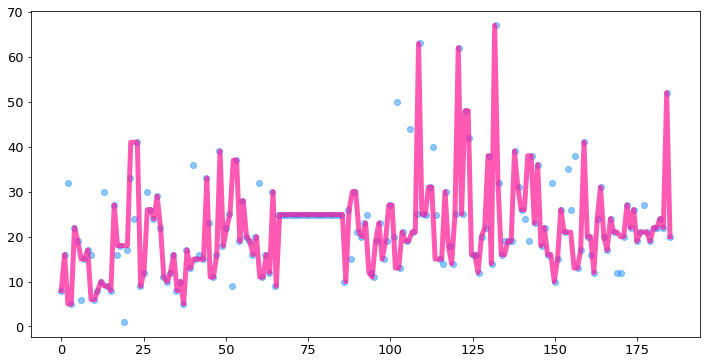

In [ ]:
#@title Plot Regressor DTR
plt.figure(figsize=(12,6))
plt.plot(p["Fecha"], p["value"], 'o',color='dodgerblue',alpha=.5)
xx = np.array([np.linspace(0, p.Fecha.max(), p.Fecha.max())]).T
plt.plot(xx, regressorDTR.predict(xx), linewidth=5, alpha=.7, label='prediction',color='deeppink')

In [ ]:
#@title Obtención de una muestra aleatoria de los datos de testeo.
#variable aleatoria
k=np.random.randint(0, len(X_test))
#El valor k se le asigna a la porción de testeo, para sacar una muestra aleatoria.
testValor=X_test[k]
#print(testValor)
#Acudimos al diccionario para traducir la muestra.
list_of_fecha=list(dicfecha.keys()) #lista de las llaves que son de tipo YY:mm:dd.
list_of_value=list(dicfecha.values()) #lista de los valores de traducción tipo entero.
pos=list_of_value.index(testValor) #indice donde se encontró el valor entero igual a la muestra.
#Imprimimos el key correspondiente a la muestra y la muestra.
print("Fecha de la muestra: ",list_of_fecha[pos]," Muestra: ", testValor)

Fecha de la muestra:  2022-01-06  Muestra:  [161]


In [ ]:
#@title Predicción de la Variable regresora a partir de la muestra.
regressorDTR.predict(testValor.reshape(1,-1))

array([20.])

In [ ]:
#@title GroundTruth de la muestra.
p[p["Fecha"]==testValor[0]]

,value,Fecha
161,16.0,161


In [ ]:
#@title Red neuronal
import keras 
import keras.backend as kb
import tensorflow as tf
from sklearn.model_selection import train_test_split
tf.random.set_seed(21)
np.random.seed(21)
X = p["Fecha"].values.reshape(-1,1)
y = p["value"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation=tf.nn.relu, input_shape= (X_train[0].shape)),
    tf.keras.layers.Dense(7, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='mean_squared_error',
              optimizer=optimizer,
              metrics=['mean_absolute_error', 'mean_squared_error','Accuracy'])

Valores menores de aprendizaje, requiere mas epochs, ya que se hacen cambios mas pequeños en los pesos, en cada actualización.

In [ ]:
history = model.fit(X_train,y_train,epochs=100,verbose=False,validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 123.5974 - mean_absolute_error: 9.0166 - mean_squared_error: 123.5974 - Accuracy: 0.0263


In [ ]:
#@title Obtención de una muestra aleatoria de los datos de testeo.
#variable aleatoria
k=np.random.randint(0, len(X_test))
#El valor k se le asigna a la porción de testeo, para sacar una muestra aleatoria.
testValor=X_test[k]
#print(testValor)
#Acudimos al diccionario para traducir la muestra.
list_of_fecha=list(dicfecha.keys()) #lista de las llaves que son de tipo YY:mm:dd.
list_of_value=list(dicfecha.values()) #lista de los valores de traducción tipo entero.
pos=list_of_value.index(testValor) #indice donde se encontró el valor entero igual a la muestra.
#Imprimimos el key correspondiente a la muestra y la muestra.
print("Fecha de la muestra: ",list_of_fecha[pos]," Muestra: ", testValor)

Fecha de la muestra:  2021-09-23  Muestra:  [116]


In [ ]:
#@title Predicción de la Variable regresora a partir de la muestra.
model.predict(testValor.reshape(1,-1))

array([[25.634031]], dtype=float32)

In [ ]:
#@title GroundTruth de la muestra.
p[p["Fecha"]==testValor[0]]

,value,Fecha
116,14.0,116


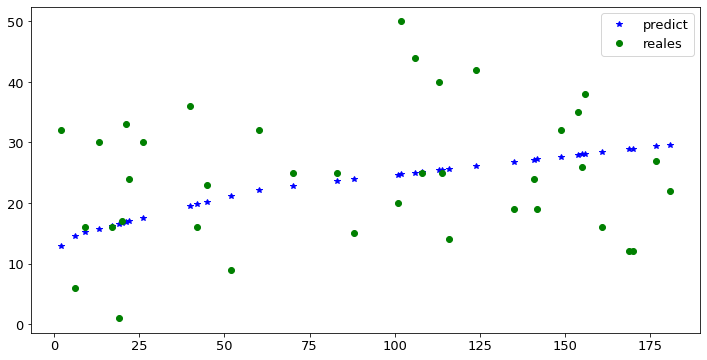

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(X_test, model.predict(X_test), 'b*', label="predict")
plt.plot(X_test, y_test,'go', label="reales")
plt.legend()
plt.show()